# Scaling of the Wind-mixed layer in presence of rotation

Dans ce Notebook nous allons verifier les lois analytiques de l'approfondissement de la couche de mélange soumis à un forçage unidirectionnel de vent dans un referentiel tournant.

In [2]:
# load required packages
import netCDF4 as nc
import matplotlib.pyplot as plt
import cmocean 
import numpy as np
import matplotlib.image as mpimg
from matplotlib.ticker import MaxNLocator
from matplotlib import colors
import xarray as xr
from matplotlib.colors import ListedColormap

from IPython.display import display, Math
bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}

Nous allons tester nos loi sur deux experiences à $f/N$ différents

Les deux simulation ont un N identique, seul le parametre de Coriolis, $f$ varie


In [45]:
file_fn_max     = '../entrainment.nc'              # lat = 90deg; f= 1e-5 ; NN = 1e-4
file_fn_min     = '../entrainment_rot_10j_bis.nc'  # lat=  45deg ;f= 1e-5; NN = 1e-4

tx      = 0.1027                  # surface stress
us      = np.sqrt(tx/1027.)   # surface friction velocity
kappa = 0.41
def coriolis (lat):
    return 4.*np.pi/86400.*np.sin(np.pi*lat/180.) 
f_u20 = coriolis(10)
f_min = coriolis(45)
f_max = coriolis(90)

NN0 =  1e-4
NN_max = NN0
NN_min = NN0


entrainment_fn_maxdata = nc.Dataset(file_fn_max)         #  I use netCDF4 to convert the time date in second 
entrainment_fn_max = xr.open_dataset(file_fn_max) 
entrainment_fn_mindata = nc.Dataset(file_fn_min)      #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)
entrainment_fn_min = xr.open_dataset(file_fn_min)

z_fn           = entrainment_fn_max.variables['z'][:, :, 0, 0]
zi_fn          = entrainment_fn_max.variables['zi'][:, :, 0, 0]
t_fn           = entrainment_fn_maxdata.variables['time'][:]
t_fnmin           = entrainment_fn_mindata.variables['time'][:]
t_fnmax           = entrainment_fn_maxdata.variables['time'][:]
NN_fn_max      = entrainment_fn_maxdata.variables['NN'][:, :, 0, 0]
NN_fn_min      = entrainment_fn_mindata.variables['NN'][:, :, 0, 0]
h_fn_max       = entrainment_fn_max.variables['mld_surf'][: , 0, 0]
h_fn_min       = entrainment_fn_min.variables['mld_surf'][: , 0, 0]
P_fn_max       = entrainment_fn_max.variables['P'][:, :, 0, 0]
P_fn_min       = entrainment_fn_min.variables['P'][:, :, 0, 0]
G_fn_max       = entrainment_fn_max.variables['G'][:, :, 0, 0]
G_fn_min       = entrainment_fn_min.variables['G'][:, :, 0, 0]
eps_max        = entrainment_fn_max.variables['eps'][:, :, 0, 0]
eps_min        = entrainment_fn_min.variables['eps'][:, :, 0, 0]
num_max        = entrainment_fn_max.variables['num'][:, :, 0, 0]
num_min        = entrainment_fn_min.variables['num'][:, :, 0, 0]
u_max          = entrainment_fn_max.variables['u'][:, :, 0, 0]
u_min          = entrainment_fn_min.variables['u'][:, :, 0, 0]
v_max          = entrainment_fn_max.variables['v'][:, :, 0, 0]
v_min          = entrainment_fn_min.variables['v'][:, :, 0, 0]
rho_min        = entrainment_fn_min.variables['rho'][: ,:, 0, 0]
rho_max        = entrainment_fn_max.variables['rho'][: ,:, 0, 0]

## Verification de l'expression de U

at $t = 0$ 
$$ U=\int_0^{-H} udz = \frac{u_*^2}{f}\sin(ft)$$

et 
$$ u(z,t)/u_* = Ro \sin(ft) -\frac{1}{\kappa}\ln(\frac{-z}{h}-1)$$

avec $ Ro = \frac{u_*}{fh(t)}$



In [82]:
h_fn_max[-1].size

1

In [110]:
time =-1
Ro_max= us/(f_max*h_fn_max)
u_max_th = np.zeros_like(z_fn[0])

for i,depth in enumerate(z_fn[0]):
    u_max_th[i] = Ro_max[time]*np.sin( f_max * t_fn[time])- 1/kappa *np.log((-depth.data/h_fn_max[time])-1)


u_max_th


array([-2.71710372e+00, -2.71386051e+00, -2.71061277e+00, -2.70736074e+00,
       -2.70410466e+00, -2.70084381e+00, -2.69757843e+00, -2.69430923e+00,
       -2.69103551e+00, -2.68775702e+00, -2.68447423e+00, -2.68118739e+00,
       -2.67789578e+00, -2.67459965e+00, -2.67129946e+00, -2.66799450e+00,
       -2.66468501e+00, -2.66137123e+00, -2.65805268e+00, -2.65473008e+00,
       -2.65140224e+00, -2.64807034e+00, -2.64473367e+00, -2.64139271e+00,
       -2.63804722e+00, -2.63469672e+00, -2.63134170e+00, -2.62798214e+00,
       -2.62461805e+00, -2.62124944e+00, -2.61787558e+00, -2.61449742e+00,
       -2.61111474e+00, -2.60772729e+00, -2.60433507e+00, -2.60093784e+00,
       -2.59753633e+00, -2.59412980e+00, -2.59071875e+00, -2.58730268e+00,
       -2.58388162e+00, -2.58045602e+00, -2.57702565e+00, -2.57359076e+00,
       -2.57015061e+00, -2.56670547e+00, -2.56325555e+00, -2.55980086e+00,
       -2.55634141e+00, -2.55287695e+00, -2.54940724e+00, -2.54593277e+00,
       -2.54245353e+00, -

### Plot de $u$

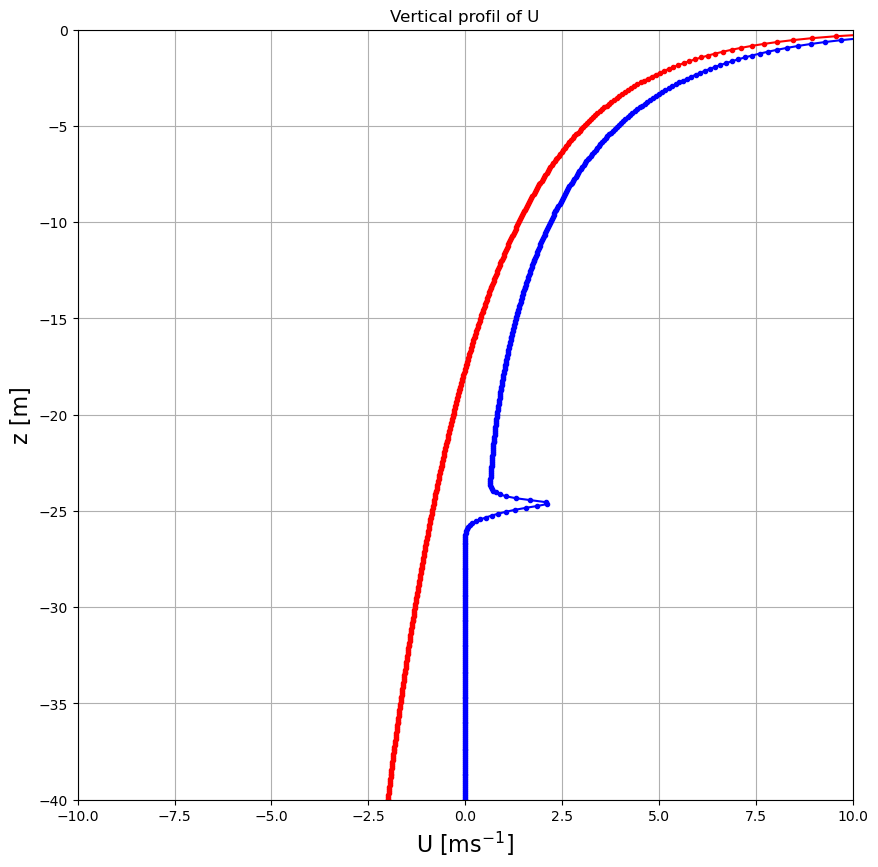

In [124]:
time =-10
Ro_max= us/(f_max*h_fn_max)
u_max_th = np.zeros_like(z_fn[0])

for i,depth in enumerate(z_fn[0]):
    #u_max_th[i] = Ro_max[time]*np.sin( f_max * t_fn[time])- 1/kappa *np.log((-depth.data/h_fn_max[time])-1)
    u_max_th[i] = - 1/kappa *np.log((-depth.data))+7


plt.figure(figsize=(10,10))
plt.title('Vertical profil of U')
plt.grid()
plt.xlabel(r'U [ms$^{-1}$]', fontsize=16)
plt.ylabel('z [m]', fontsize=16)
plt.xlim([-0.1/us, 0.1/us]); plt.ylim([-40, 0])
plt.plot(u_max[time]/us, z_fn[time], '.-', color='b',label=r'tend')
plt.plot(u_max_th, z_fn[time], '.-', color='r',label=r'tend')


### Plot de v

/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: divide by zero encountered in divide
  result_data = func(*input_data)


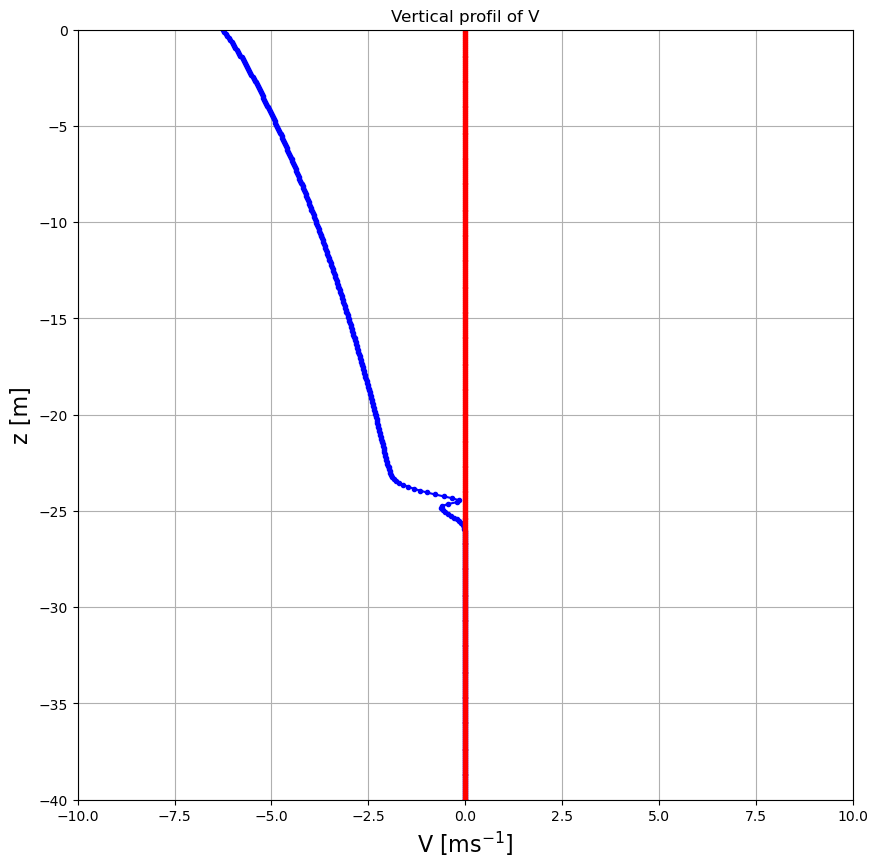

In [127]:
time =-10
Ro_max= us/(f_max*h_fn_max)
v_max_th = np.zeros_like(z_fn[0])

for i,depth in enumerate(z_fn[0]):
   # v_max_th[i] = Ro_max[time]*np.sin( f_max * t_fn[time])- 1/kappa *np.log((-depth.data/h_fn_max[time])-1)
    v_max_th[i] = - f_max*us/kappa**2 * (-depth.data)*np.log((-depth.data))


plt.figure(figsize=(10,10))
plt.title('Vertical profil of V')
plt.grid()
plt.xlabel(r'V [ms$^{-1}$]', fontsize=16)
plt.ylabel('z [m]', fontsize=16)
plt.xlim([-0.1/us, 0.1/us]); plt.ylim([-40, 0])
plt.plot(v_max[time]/us, z_fn[time], '.-', color='b',label=r'tend')
plt.plot(v_max_th, z_fn[time], '.-', color='r',label=r'tend')